<a href="https://colab.research.google.com/github/jidemaestri/Financial-Markets/blob/master/01_stock_quant_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 24,12
import seaborn as sb
sb.set()
import pandas_datareader as pdr
import yfinance as yf 

Getting Microsoft stock data


In [3]:
msft = yf.download("MSFT")

[*********************100%***********************]  1 of 1 completed


In [42]:
meli = yf.download("MELI")

[*********************100%***********************]  1 of 1 completed


In [4]:
msft.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060980,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063158,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064247,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062613,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061524,47894400


In [5]:
msft_close = msft["Close"]

Using Numpy to calculate immediate returns

In [6]:
msft_return =  round(np.log(msft_close).diff()*100,2)

In [7]:
msft_return

Date
1986-03-13     NaN
1986-03-14    3.51
1986-03-17    1.71
1986-03-18   -2.58
1986-03-19   -1.75
              ... 
2022-10-18    0.41
2022-10-19   -0.85
2022-10-20   -0.14
2022-10-21    2.50
2022-10-24    0.47
Name: Close, Length: 9230, dtype: float64

Plotting the Returns

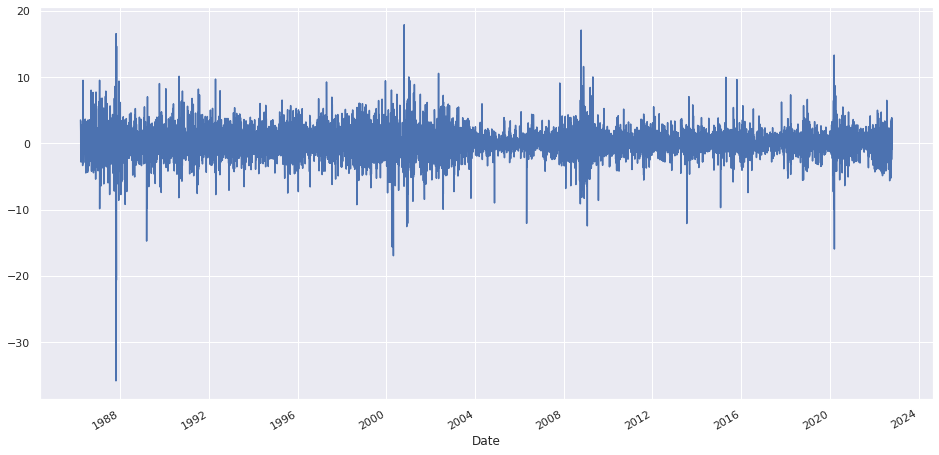

In [8]:
msft_return.plot()

Process defined in functions

In [9]:
def plot_stock_return(df):
  stock = yf.download(df)
  stock_close = stock["Close"]
  stock_return = round(np.log(stock_close).diff()*100,2)
  stock_return.plot()


In [10]:
def stock_return(df):
  stock = yf.download(df)
  stock_close = stock["Close"]
  stock_return = round(np.log(stock_close).diff()*100,2)
  stock_return.dropna(inplace=True)
  return stock_return

In [11]:
amzn_return = stock_return("AMZN")

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


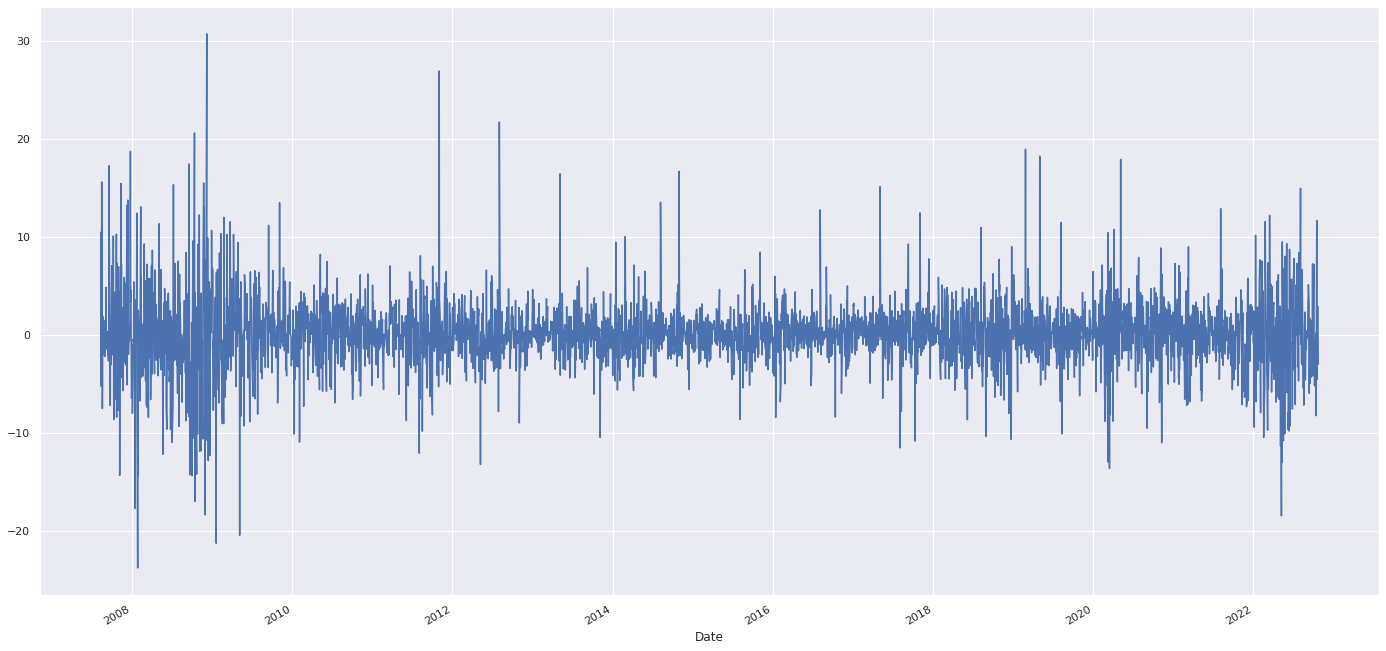

In [22]:
MELI = plot_stock_return("MELI")

[*********************100%***********************]  1 of 1 completed


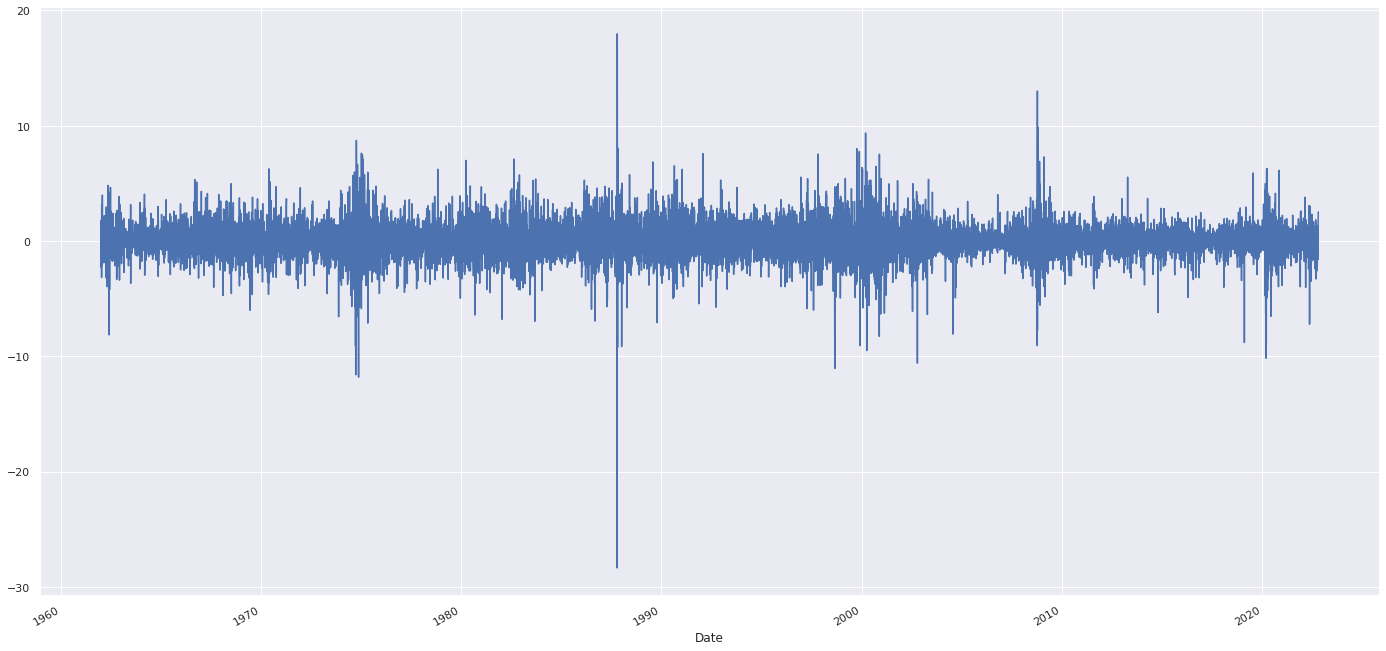

In [23]:
KO = plot_stock_return("KO")

In [13]:
msft_return.describe()

count    9229.000000
mean        0.084788
std         2.140335
min       -35.830000
25%        -0.930000
50%         0.030000
75%         1.120000
max        17.870000
Name: Close, dtype: float64

Using Scipy to get a statistical description

In [14]:
msft_return.dropna(inplace=True)

In [15]:
from scipy import stats

In [16]:
stats.describe(msft_return)

DescribeResult(nobs=9229, minmax=(-35.83, 17.87), mean=0.08478816773214866, variance=4.581033518732977, skewness=-0.5831311721854879, kurtosis=14.838544200719067)

Skewness differentiates extreme values in one versus the other tail, kurtosis measures extreme values in either tail. Distributions with large kurtosis exhibit tail data exceeding the tails of the normal distribution (e.g., five or more standard deviations from the mean). Distributions with low kurtosis exhibit tail data that are generally less extreme than the tails of the normal distribution.



For investors, high kurtosis of the return distribution implies the investor will experience occasional extreme returns (either positive or negative), more extreme than the usual + or - three standard deviations from the mean that is predicted by the normal distribution of returns. This phenomenon is known as kurtosis risk.

In [29]:
meli_return = stock_return("MELI")

[*********************100%***********************]  1 of 1 completed


In [30]:
stats.describe(meli_return)

DescribeResult(nobs=3828, minmax=(-23.82, 30.75), mean=0.0874712643678161, variance=12.793975992118915, skewness=0.27239471898971485, kurtosis=7.320834231713214)

In [18]:
from scipy.stats import stats

(array([1.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 9.000e+00, 1.700e+01,
        3.600e+01, 7.200e+01, 1.690e+02, 4.630e+02, 1.206e+03, 1.158e+03,
        4.390e+02, 1.360e+02, 5.300e+01, 2.600e+01, 1.600e+01, 7.000e+00,
        6.000e+00, 4.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00]),
 array([-23.82  , -21.6372, -19.4544, -17.2716, -15.0888, -12.906 ,
        -10.7232,  -8.5404,  -6.3576,  -4.1748,  -1.992 ,   0.1908,
          2.3736,   4.5564,   6.7392,   8.922 ,  11.1048,  13.2876,
         15.4704,  17.6532,  19.836 ,  22.0188,  24.2016,  26.3844,
         28.5672,  30.75  ]),
 <a list of 25 Patch objects>)

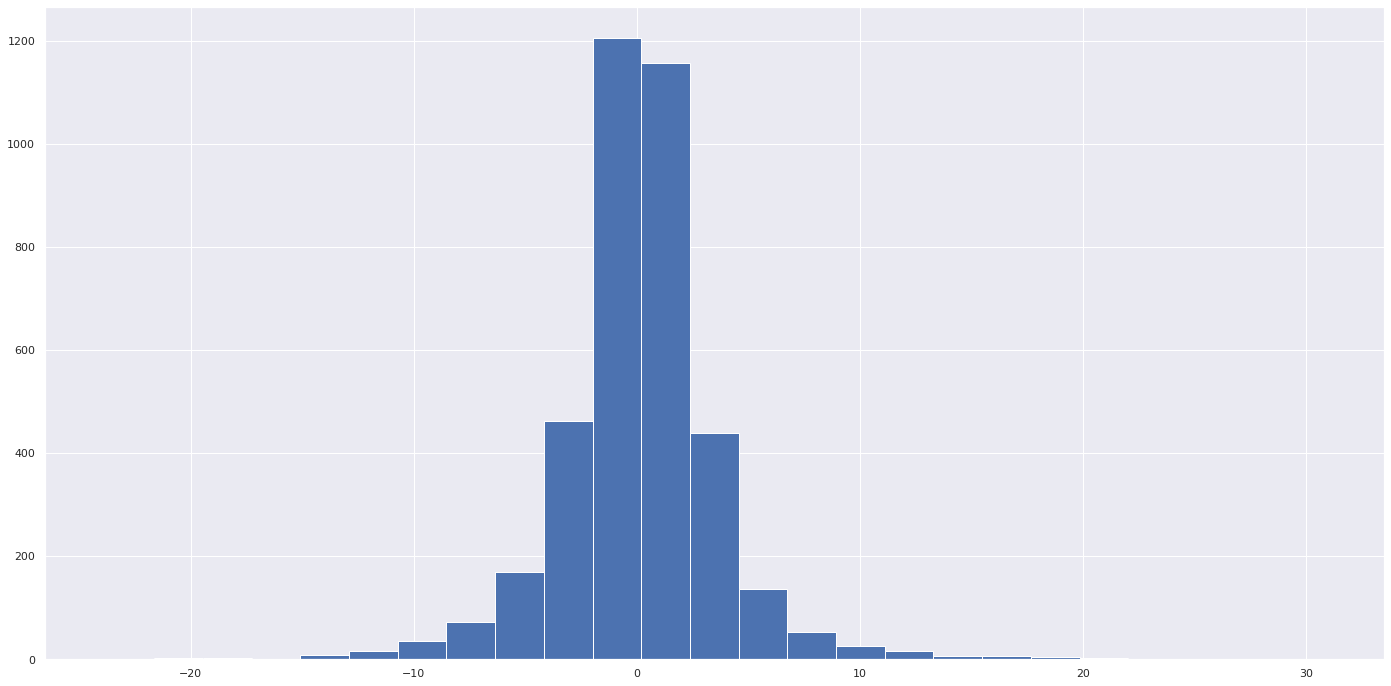

In [31]:
plt.hist(meli_return, bins=25)

In [32]:
n, minmax, mean, var, skew, kurt = stats.describe(meli_return)
mini, maxi = minmax
std = var ** .5

In [33]:
from scipy.stats import norm
x = norm.rvs(mean, std, n)


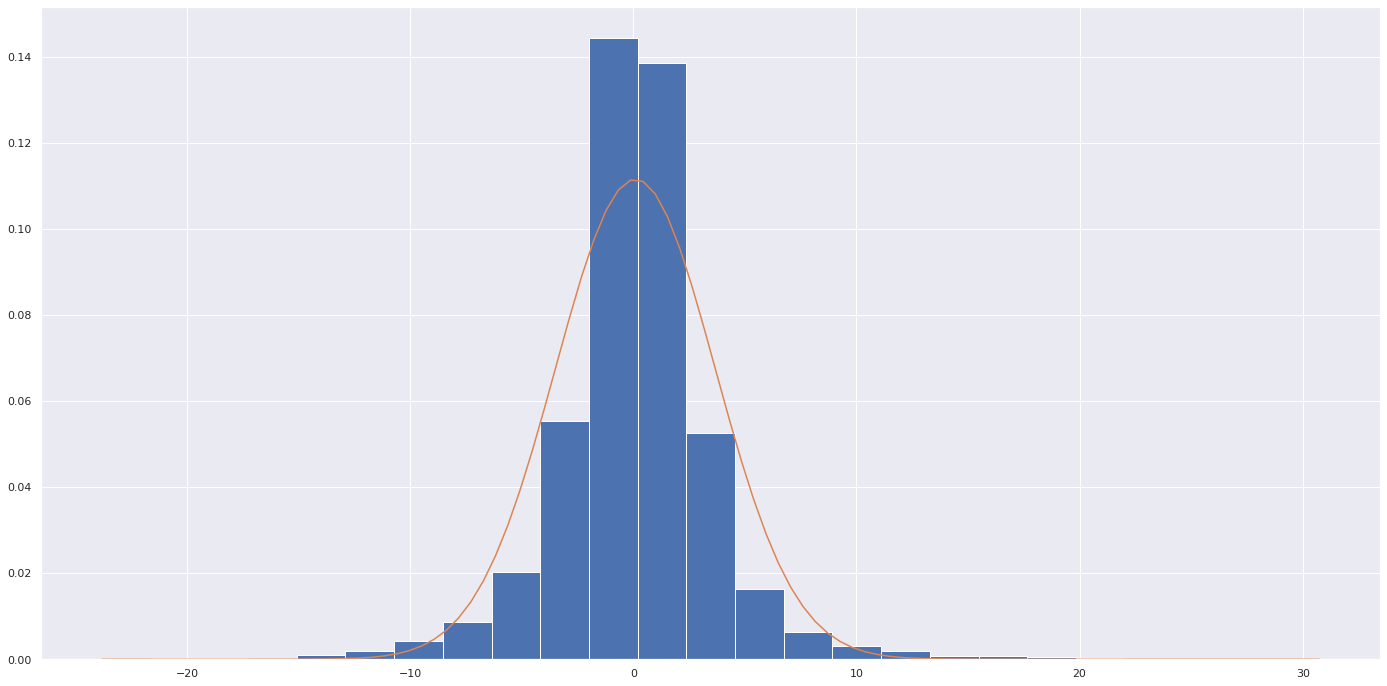

In [34]:
plt.hist(meli_return, bins = 25, edgecolor='w', density= True)
data = np.linspace(mini, maxi, 100)
plt.plot(data, norm.pdf(data, mean, std));


In [36]:
x_test = stats.kurtosistest(x)
amzn_test = stats.kurtosistest(meli_return)
print(f'{"     Test statistic":20}{"p-value":>15}')
print(f'{" "*5}{"-"* 30}')
print(f"x:{x_test[0]:>17.2f}{x_test[1]:16.4f}")
print(f"MELI: {meli_return[0]:13.2f}{meli_return[1]:16.4f}")

     Test statistic         p-value
     ------------------------------
x:            -0.41          0.6854
MELI:         10.48         -5.2500


In [37]:
stats.ttest_1samp(meli_return.sample(252), 0, alternative='two-sided')


Ttest_1sampResult(statistic=0.11075589321538452, pvalue=0.9118984307614584)

Can price movement be described as a random walk?


Getting price lags

In [44]:
meli_close = pd.DataFrame(meli.Close, columns= ['Close'])
meli_close['lag_1'] = meli_close.Close.shift(1)
meli_close['lag_2'] = meli_close.Close.shift(2)
meli_close.dropna(inplace = True)
meli_close.tail()

,Close,lag_1,lag_2
Date,,,
2022-10-18,853.289978,850.659973,756.880005
2022-10-19,815.450012,853.289978,850.659973
2022-10-20,820.469971,815.450012,853.289978
2022-10-21,844.900024,820.469971,815.450012
2022-10-24,813.830017,844.900024,820.469971


Predicting price with Numpy 

In [46]:
lr = np.linalg.lstsq(meli_close[['lag_1', 'lag_2']], meli_close.Close, rcond=None)[0]


In [47]:
meli_close['predict'] = np.dot(meli_close[['lag_1', 'lag_2']], lr)


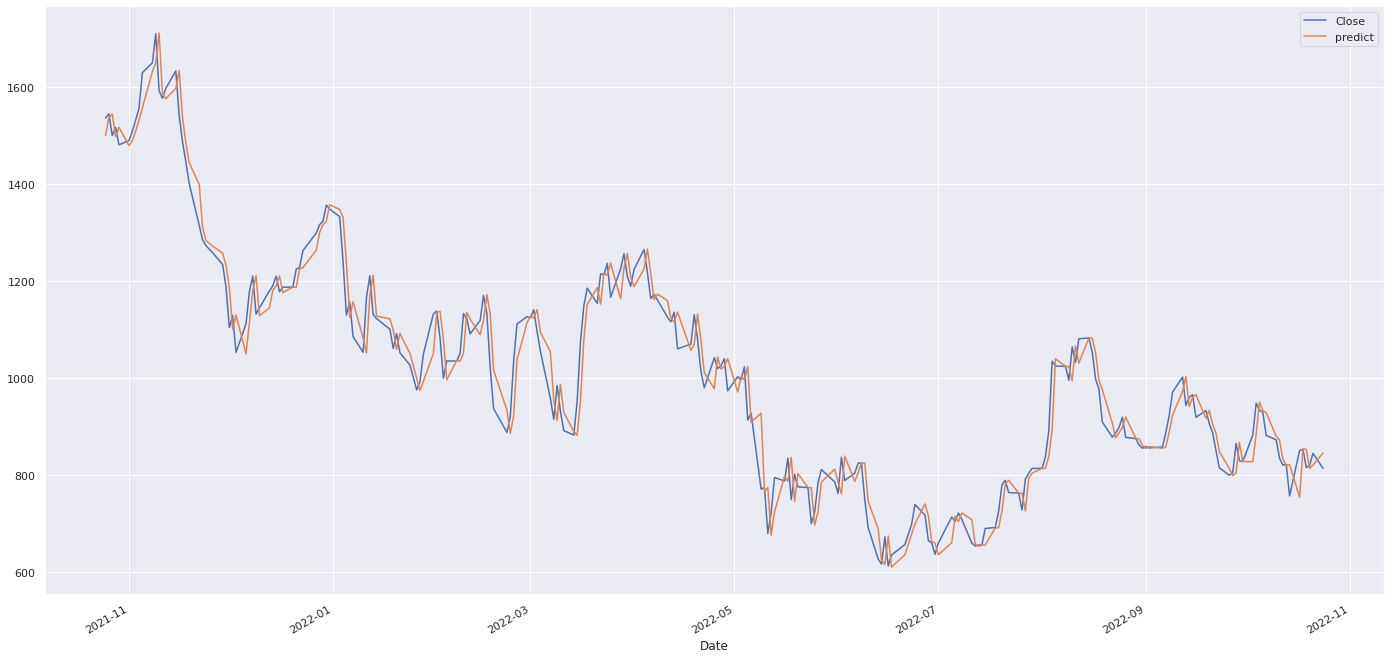

In [48]:
meli_close.iloc[-252:][['Close', 'predict']].plot()


Bucketized in functions


In [51]:
def get_stock_lags(df):
  stock = yf.download(df)
  stock_close = pd.DataFrame(stock.Close, columns= ['Close'])
  stock_close['lag_1'] = stock_close.Close.shift(1)
  stock_close['lag_2'] = stock_close.Close.shift(2)
  stock_close['lag_3'] = stock_close.Close.shift(3)
  stock_close.dropna(inplace = True)
  return stock_close.tail()
  

In [52]:
coke_stock_lag = get_stock_lags("KO")

[*********************100%***********************]  1 of 1 completed


In [53]:
coke_stock_lag.tail()

,Close,lag_1,lag_2,lag_3
Date,,,,
2022-10-18,56.439999,55.689999,54.980000,55.869999
2022-10-19,55.959999,56.439999,55.689999,54.980000
2022-10-20,55.080002,55.959999,56.439999,55.689999
2022-10-21,55.959999,55.080002,55.959999,56.439999
2022-10-24,57.215000,55.959999,55.080002,55.959999


In [54]:
def predict_prices_lags(df):
  stock = yf.download(df)
  stock_close = pd.DataFrame(stock.Close, columns= ['Close'])
  stock_close['lag_1'] = stock_close.Close.shift(1)
  stock_close['lag_2'] = stock_close.Close.shift(2)
  stock_close['lag_3'] = stock_close.Close.shift(3)
  stock_close.dropna(inplace = True)
  lr = np.linalg.lstsq(stock_close[['lag_1', 'lag_2', 'lag_3']], stock_close.Close, rcond=None)[0]
  stock_close['predict'] = np.dot(stock_close[['lag_1', 'lag_2', 'lag_3']], lr)
  stock_close.iloc[-252:][['Close', 'predict']].plot()
  return lr

[*********************100%***********************]  1 of 1 completed


array([0.98960442, 0.00552117, 0.00497189])

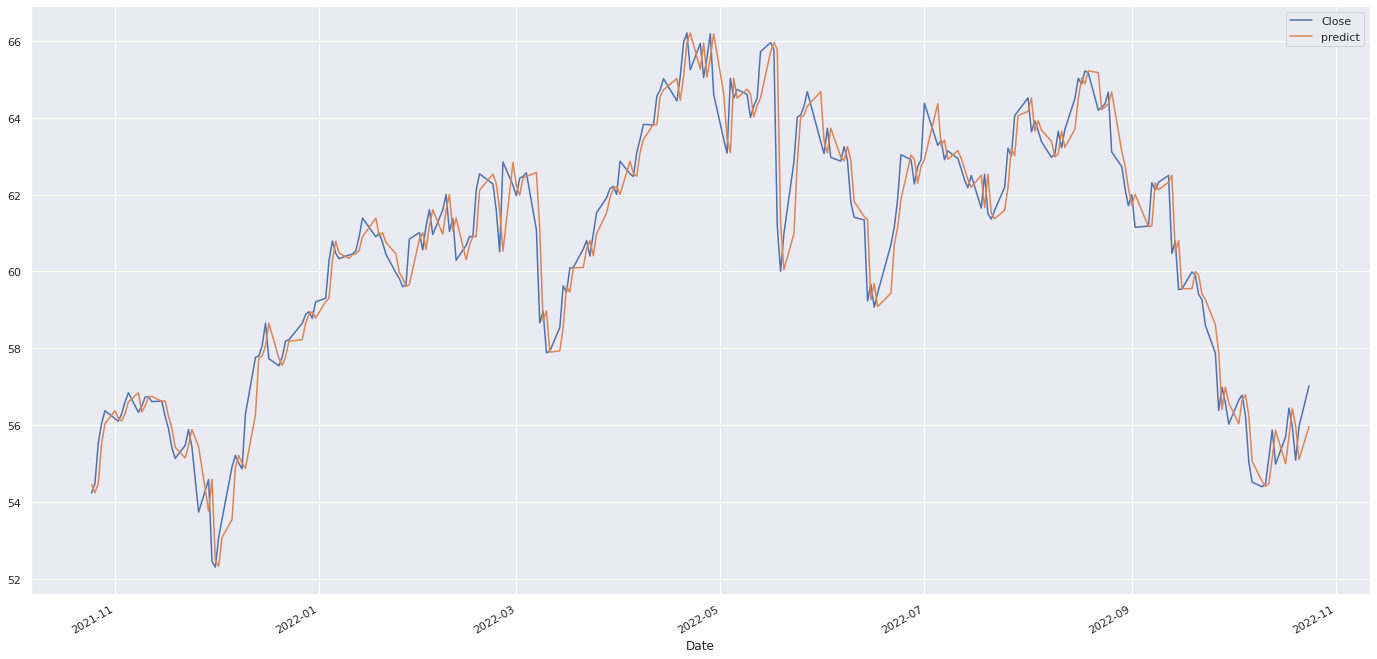

In [56]:
predict_prices_lags("KO")